In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from os import path as osp
%matplotlib inline

In [2]:
sns.set()

In [3]:
baseline_dir = '../contrastive_vm/contrastive'
candidate_dir = '../embedding_regularizer_dist_from_center_vm2/embedding_regularizer_dist_from_center'

# Does using embedding regularizer provide better MAPR?

Baseline MAP@R: [0.253, 0.262]

Embedding regularizer MAP@R: [0.265, 0.267] 

# Does using embedding reg provide faster bayesian optimization?

## It doesnt

Baseline:

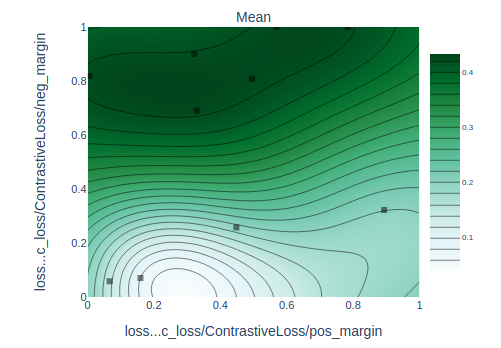

Candidate:

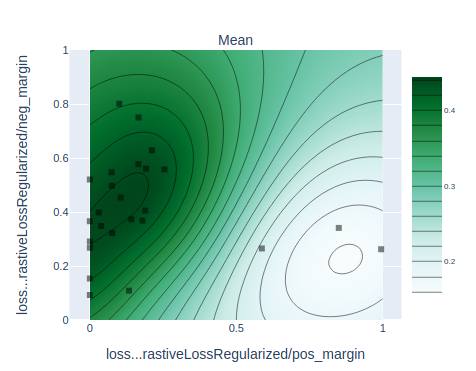

Takeaway: regularization makes optimization easier, defines the optimal positive and negative margins better

# Does using embedding regularizer provide better convergence?
## It doesnt

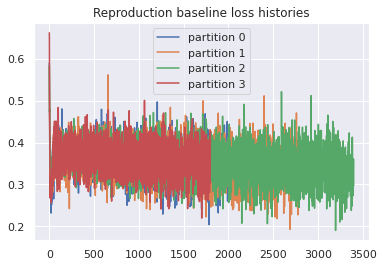

In [4]:
def get_reproduction_dirs(root):
    return [fname for fname in os.listdir(root) if 'reproduction' in fname]

def get_repr_csvs(root, csv_name):
    for repr_dir in get_reproduction_dirs(root):
        repr_path = osp.join(root, repr_dir)

        dfs = []
        for partition in range(0, 4):
            part_path = osp.join(repr_path, f'Test50_50_Partitions4_{partition}')

            df = pd.read_csv(osp.join(part_path, 'saved_csvs', csv_name))
            dfs.append(df)
    
    return dfs

def get_repr_loss_histories(root):
    return get_repr_csvs(root, 'loss_histories.csv')

loss_hists = get_repr_loss_histories(baseline_dir)

plt.figure()
for i, df in enumerate(loss_hists):
    sns.lineplot(data=df['total_loss'], label=f'partition {i}')
plt.legend()
plt.title('Reproduction baseline loss histories')
plt.show()

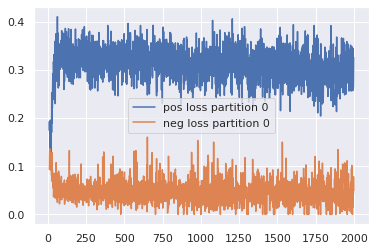

In [6]:
neg_loss_csv = 'metric_loss_ContrastiveLoss_reducer_MultipleReducers_reducers_ModuleDict_neg_loss_AvgNonZeroReducer.csv'
pos_loss_csv = 'metric_loss_ContrastiveLoss_reducer_MultipleReducers_reducers_ModuleDict_pos_loss_AvgNonZeroReducer.csv'

dfs_neg_loss = get_repr_csvs(baseline_dir, neg_loss_csv)
dfs_pos_loss = get_repr_csvs(baseline_dir, pos_loss_csv)

plt.figure()
for i, df in enumerate(dfs_pos_loss):
    sns.lineplot(data=df['pos_loss'].iloc[10:], label=f'pos loss partition {i}')
    sns.lineplot(data=dfs_neg_loss[i]['neg_loss'].iloc[10:], label=f'neg loss partition {i}')
    break
plt.legend()
plt.show()

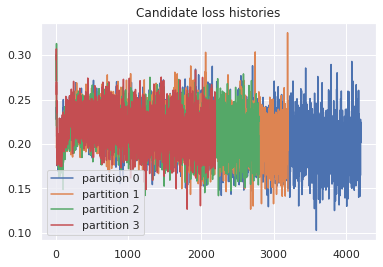

In [9]:
loss_hists = get_repr_loss_histories(candidate_dir)

plt.figure()
for i, df in enumerate(loss_hists):
    sns.lineplot(data=df['total_loss'].iloc[10:], label=f'partition {i}')
plt.legend()
plt.title('Candidate loss histories')
plt.show()

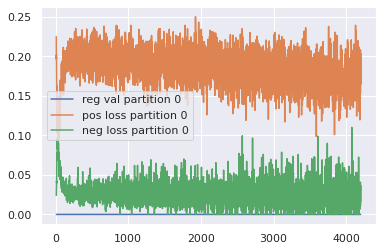

In [12]:
candidate_csv = 'metric_loss_ContrastiveLossRegularized_reducer_MultipleReducers_reducers_ModuleDict_neg_loss_RegularizerAvgNonZeroReducer.csv'

dfs_neg_loss = get_repr_csvs(candidate_dir, candidate_csv)

candidate_csv = 'metric_loss_ContrastiveLossRegularized_reducer_MultipleReducers_reducers_ModuleDict_pos_loss_RegularizerAvgNonZeroReducer.csv'

dfs_pos_loss = get_repr_csvs(candidate_dir, candidate_csv)

plt.figure()
for i, df in enumerate(dfs_pos_loss):
    sns.lineplot(data=df['reg_val'].iloc[10:], label=f'reg val partition {i}')
    sns.lineplot(data=df['pos_loss'].iloc[10:], label=f'pos loss partition {i}')
    sns.lineplot(data=dfs_neg_loss[i]['neg_loss'].iloc[10:], label=f'neg loss partition {i}')
    break
plt.legend()
plt.show()